### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Part One: Regression using Python

## 1. Load and explore the data

In [1]:
# Import the necessary libraries and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file as reviews using pd.read_csv() function.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame and DataFrame metadata.
print(reviews.dtypes)
print(reviews.info())
reviews.head()

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform               

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Identify any missing values using df.isna() function.
reviews_na = reviews[reviews.isna().any(axis=1)]

# Use shape method to identify number of missing values.
reviews_na.shape

(0, 11)

There are no missing values.

In [4]:
# Explore the data using describe() function.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [5]:
# Drop unnecessary columns using drop() function.
reviews = reviews.drop(['language', 'platform'], axis = 1)

# View column names using columns method.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [6]:
# Rename the column headers using rename() function.
reviews = reviews.rename(columns = {'remuneration (k£)':'remuneration', 
                                   'spending_score (1-100)':'spending_score'})

# View column names using columns method.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [7]:
# Create a CSV file as output by using to_csv() function.
reviews.to_csv('reviews.csv', index = False)

In [8]:
# Import new CSV file with Pandas: the read_csv() function.
reviews = pd.read_csv('reviews.csv')

# View DataFrame and DataFrame metadata.
print(reviews.shape)
print(reviews.dtypes)
reviews.head()

(2000, 9)
gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [9]:
# Set Independent variable as spending_score.
x1 = reviews['spending_score']

# Set Dependent variable as loyalty_points.
y = reviews['loyalty_points']

# Create OLS model by using ols() and fit() functions.
# Create model summary by using summary() function.
f1 = 'y ~ x1'
test1 = ols(f1, data = reviews).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        14:11:43   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x1            33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Extract the estimated parameters by using print() function \
# and the params method.
print("Parameters: ", test1.params)  

# Extract the standard errors by using print() function and \
# the bse method.
print("Standard errors: ", test1.bse)  

# Extract the predicted values by using print() and predict() \
# functions.
print("Predicted values: ", test1.predict()) 

Parameters:  Intercept   -75.052663
x1           33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x1            0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [11]:
# Set the X coefficient and the constant to generate the regression table.
y_pred1 = (-75.0527) + 33.0617 * x1

# View the output.
y_pred1

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

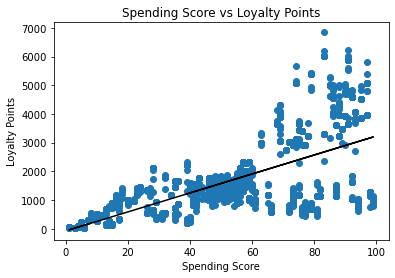

In [12]:
# Plot the graph by using scatter() function.
plt.scatter(x1, y)

# Plot the regression line using plot() function.
plt.plot(x1, y_pred1, color = 'black')

# Set graph title and labels.
plt.title('Spending Score vs Loyalty Points')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

# View the graph with show() function.
plt.show()

### 5b) remuneration vs loyalty

In [13]:
# Set Independent variable as remuneration.
x2 = reviews['remuneration']

# Set Dependent variable as loyalty_points.
y = reviews['loyalty_points']

# Create OLS model by using ols() and fit() functions.
# Create model summary by using summary() function.
f2 = 'y ~ x2'
test2 = ols(f2, data = reviews).fit()
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        14:11:44   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Extract the estimated parameters by using print() function \
# and the params method.
print("Parameters: ", test2.params)  

# Extract the standard errors by using print() function and \
# the bse method.
print("Standard errors: ", test2.bse)  

# Extract the predicted values by using print() and predict() \
# functions.
print("Predicted values: ", test2.predict()) 

Parameters:  Intercept   -65.686513
x2           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x2            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [15]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred2 = (-65.6865) + 34.1878 * x2

# View the output.
y_pred2

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

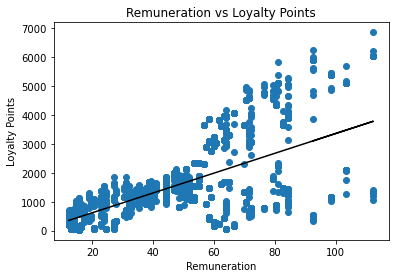

In [16]:
# Plot the graph by using scatter() function.
plt.scatter(x2, y)

# Plot the regression line using plot() function.
plt.plot(x2, y_pred2, color = 'black')

# Set graph title and labels.
plt.title('Remuneration vs Loyalty Points')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

# View the graph with show() function.
plt.show()

### 5c) age vs loyalty

In [17]:
# Set Independent variable as age.
x3 = reviews['age']

# Set Dependent variable as loyalty_points.
y = reviews['loyalty_points']

# Create OLS model by using ols() and fit() functions.
# Create model summary by using summary() function.
f3 = 'y ~ x3'
test3 = ols(f3, data = reviews).fit()
test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 26 Dec 2022   Prob (F-statistic):             0.0577
Time:                        14:11:45   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x3            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Extract the estimated parameters by using print() function \
# and the params method.
print("Parameters: ", test3.params)  

# Extract the standard errors by using print() function and \
# the bse method.
print("Standard errors: ", test3.bse)  

# Extract the predicted values by using print() and predict() \
# functions.
print("Predicted values: ", test3.predict()) 

Parameters:  Intercept    1736.517739
x3             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x3            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [19]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred3 = 1736.5177 + (-4.0128) * x3

# View the output.
y_pred3

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

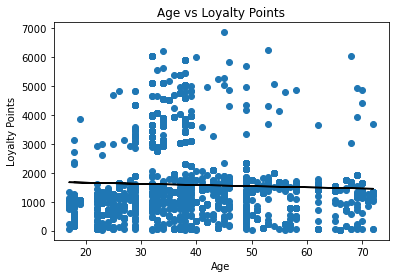

In [20]:
# Plot the graph by using scatter() function.
plt.scatter(x3, y)

# Plot the regression line using plot() function.
plt.plot(x3, y_pred3, color = 'black')

# Set graph title and labels.
plt.title('Age vs Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

# View the graph with show() function.
plt.show()

## 6. Observations and insights

***Your observations here...***






Spending score: The model of spending score vs loyalty points has an r-squared value of around 45%, meaning around 45% of the total variation in loyalty points can be explained by the total variation in spending score. The p-value of the coefficient on spending score is around 0, meaning the coefficient is statistically significant: a 1-unit increase in spending score, ceteris paribus, leads to a 33.0617 increase in loyalty points. The plot of spending score vs loyalty points indicates a linear relationship between the 2 variables until spending score reaches 60. For higher spending scores, there doesn't appear to be a linear relationship between spending score and loyalty points.

Remuneration: The model of remuneration vs loyalty points has an r-squared value of around 38%, meaning around 38% of the total variation in loyalty points can be explained by the total variation in remuneration. The p-value of the coefficient on remuneration is around 0, meaning the coefficient is statistically significant: a £1,000 increase in remuneration, ceteris paribus, leads to a 34.1878 increase in loyalty points. The plot of remuneration vs loyalty points indicates a linear relationship between the 2 variables until remuneration reaches at least £50,000. For higher remunerations, there doesn't appear to be a linear relationship between remuneration and loyalty points.

Age: The model of age vs loyalty points has an r-squared value of around 0%, meaning none of the total variation in loyalty points can be explained by the total variation in age. The p-value of the coefficient on age is greater than 0.05. This means when testing a null hypothesis that the coefficient on age equals 0, we do not reject this null hypothesis with a 5% significance level. The plot of age vs loyalty points confirms there is no relationship between age and loyalty points.

I would like to split the reviews DataFrame into groups by spending score and remuneration, in order to better explore these variables' relationship to loyalty points for high values of spending score and remuneration.

# 

# Part Two: Clustering with *k*-means using Python

## 1. Load and explore the data

In [21]:
# Import the necessary libraries and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load the CSV file prepared in Part One as df2.
df2 = pd.read_csv('reviews.csv')

# View DataFrame by using head() function.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [23]:
# Drop unnecessary columns by using drop() function.
df2 = df2.drop(['gender', 'age', 'loyalty_points', 'education', 
               'product', 'review', 'summary'], axis = 1)

# View DataFrame.
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [24]:
# Explore the data and metadata.
print(df2.shape)
print(df2.info())
print(df2.dtypes)

(2000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
remuneration      float64
spending_score      int64
dtype: object


In [25]:
# Generate Descriptive statistics by using describe() function.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

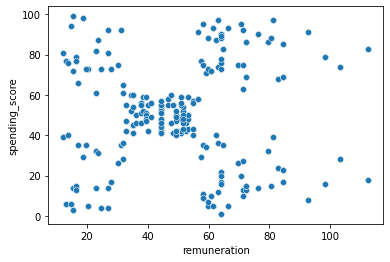

In [26]:
# Create a scatterplot with Seaborn of remuneration against \
# spending_score.
sns.scatterplot(x = 'remuneration', 
               y = 'spending_score', 
               data = df2)

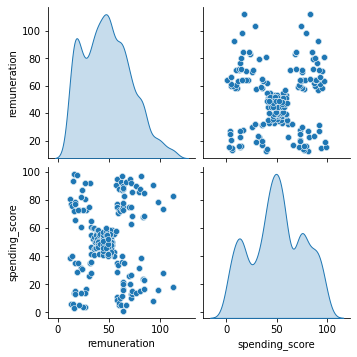

In [27]:
# Create a pairplot with Seaborn.
# Store remuneration and spending_score in the variable x.
x = df2[['remuneration', 'spending_score']]

# Create a pairplot of remuneration against spending_score.
sns.pairplot(df2, 
            vars = x, 
            diag_kind = 'kde')

Based on the above scatterplot and pairplot, there appear to be 5 clusters.

## 3. Elbow and silhoutte methods

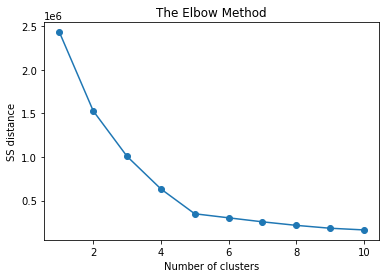

In [28]:
# Determine the number of clusters: Elbow method.
# Use Elbow chart to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

# View Elbow chart by using show() function.
plt.show()

The above plot appears to become linear at 5 clusters, and an elbow-like feature appears at this point. So 5 appear to be the optimal number of clusters. That said, the values 6 and 7 also have low values of WSS (within-cluster-sum of squared errors).

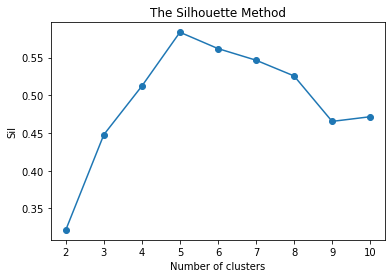

In [29]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

# View the Silhouette chart by using show() function.
plt.show()

In this plot, 5 clusters has the highest silhouette value, so 5 clusters again appears to be the optimal number of clusters. That said, the values of 6 and 7 clusters also have high silhouette values.

## 4. Evaluate k-means model at different values of *k*

Based on my findings from the Elbow and Silhouette Methods, I have decided to evaluate the usefulness of the following values of k: 5, 6 and 7. I predict 5 will provide the best clustering.

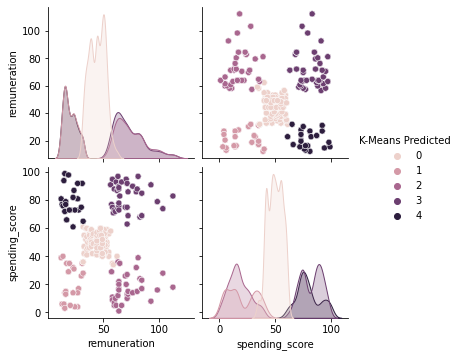

In [30]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 300,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted values by using pairplot() function.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

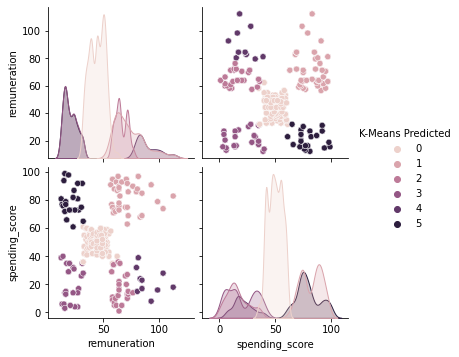

In [31]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 300,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted values by using pairplot() function.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

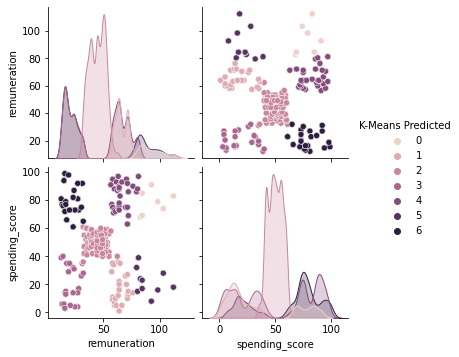

In [32]:
# Use seven clusters.
kmeans = KMeans(n_clusters = 7, 
                max_iter = 300,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted values by using pairplot() function.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

For the k-means model with six clusters, clusters 2 & 4 appear too close together to add any value. Similarly, for the k-means model with seven clusters, clusters 0 & 4 and clusters 1 & 5 also appear too close together to add any value. When the k-means model is run with five clusters, each cluster appears clearly separated from each other, and each cluster looks closely grouped. Therefore, I have chosen to use five clusters in the final model.

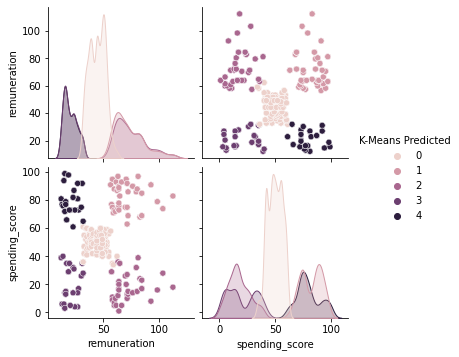

In [33]:
# Apply the final model with 5 clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 300,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted values by using pairplot() function.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [34]:
# Check the number of observations per predicted class.
# Use value_counts() function on the 'K-Means Predicted' column.
x['K-Means Predicted'].value_counts()

0    774
1    356
2    330
3    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [35]:
# View the DataFrame by using head() function.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  4
2         13.12               6                  3
3         13.12              77                  4
4         13.94              40                  3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

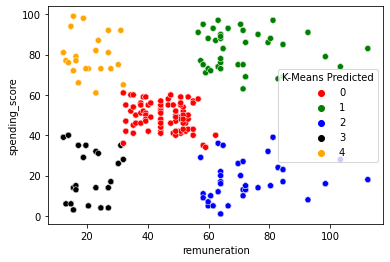

In [36]:
# Visualise the remuneration-spending_score clusters by using \
# scatterplot() function. Set data equal to x variable.
# Set hue equal to the 'K-Means Predicted' column.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 7. Discuss: Insights and observations

***Your observations here...***

The scatterplot indicates that customers fall into five market segments:
1. Customers with low remuneration and spending scores
2. Customers with low remuneration but high spending scores
3. Customers with medium levels of remuneration and spending scores
4. Customers with high remuneration but low spending scores
5. Customers with high remuneration and spending scores

Based on this information, Turtle Games should target customers in the market segments with low spending scores in order to improve sales. For example, customers in the low remuneration and low spending scores market segment should be targeted with discount offers, while customers in the high remuneration and low spending scores market segment should be targeted with rewards that come from repeat purchases. Similar strategies can be used to target customers in the market segment with medium levels of remuneration and spending scores, in order to move these customers into market segments with high spending scores.

# 

# Part 3: NLP using Python

## 1. Load and explore the data

In [37]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexsewell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexsewell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Load the data set prepared in Part One as df3.
df3 = pd.read_csv('reviews.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [39]:
# Explore data set.
print(df3.shape)
print(df3.dtypes)
print(df3.info())

(2000, 9)
gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [40]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(['gender', 'age', 'remuneration', 'spending_score', 
                'loyalty_points', 'education', 'product'], 
               axis = 1)

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [41]:
# Determine if there are any missing values.
df3_na = df3[df3.isna().any(axis=1)]

df3_na.shape

(0, 2)

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [42]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [43]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [44]:
# Replace all the punctuation in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [45]:
# Replace all the puncuation in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [46]:
# Determine the number of duplicate rows
df3.duplicated().sum()

39

In [47]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review', 'summary'])

# View DataFrame.
df3.reset_index(inplace=True)
df3

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [48]:
# Create new DataFrame (copy DataFrame).
df4 = df3.copy()

# View DataFrame.
df4

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


In [49]:
# Apply tokenisation to both columns.
df4['tokens1'] = df4['review'].apply(word_tokenize)
df4['tokens2'] = df4['summary'].apply(word_tokenize)

# View DataFrame.
df4

,index,review,summary,tokens1,tokens2
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1957,1996,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1958,1997,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1959,1998,fun game,four stars,"[fun, game]","[four, stars]"


In [50]:
# Review: Create a word cloud.
# Define an empty list of tokens.
all_tokens1 = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens1 = all_tokens1 + df4['tokens1'][i]
    
all_tokens1

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [51]:
# Define an empty string variable.
tokens1_string = ''

# Add each token word to the string.
for value in all_tokens1:
    tokens1_string = tokens1_string + value + ' '
    
tokens1_string

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could 

In [52]:
# Create a WordCloud.
wordcloud1 = WordCloud(width = 1600, height = 900, 
                       background_color ='white', colormap='plasma', 
                       stopwords = 'none', 
                       min_font_size = 10).generate(tokens1_string) 

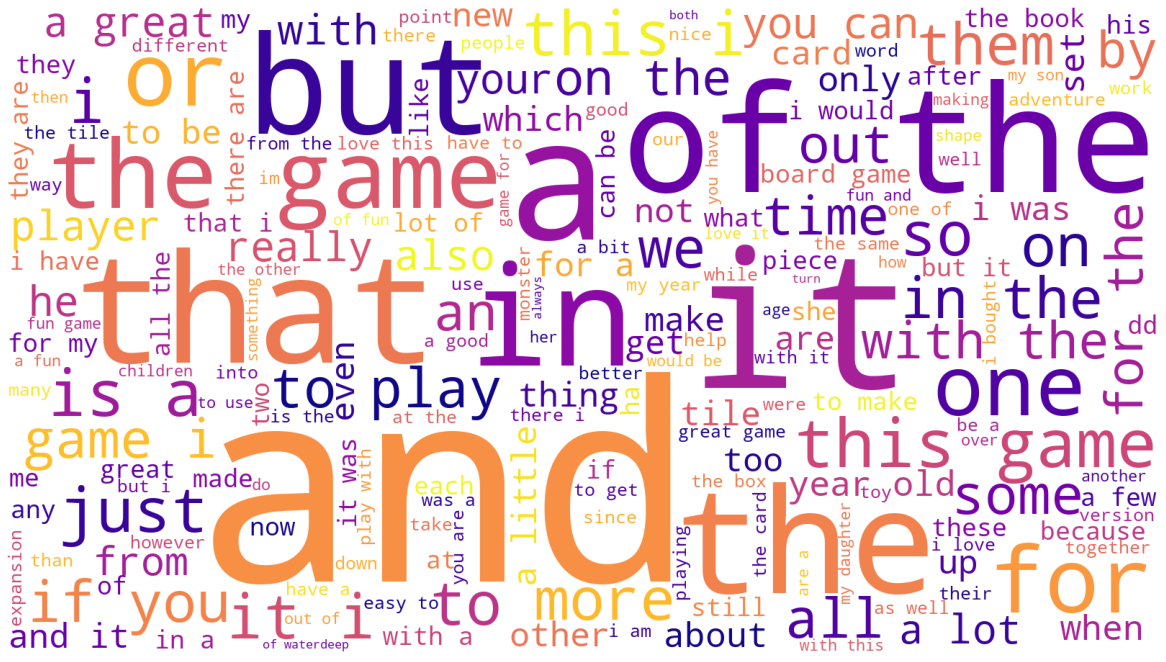

In [53]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [54]:
# Summary: Create a word cloud.
# Define an empty list of tokens.
all_tokens2 = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens2 = all_tokens2 + df4['tokens2'][i]
    
all_tokens2

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [55]:
# Define an empty string variable.
tokens2_string = ''

# Add each token word to the string.
for value in all_tokens2:
    tokens2_string = tokens2_string + value + ' '
    
tokens2_string

'the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity not a value add to the product line five stars love the map not a general dm screen very weak game fell completely flat five stars good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a great buy cant wait to work on this book stained glass perfection four stars so beautiful great pictures very nice five stars fiv

In [56]:
# Create a WordCloud.
wordcloud2 = WordCloud(width = 1600, height = 900, 
                       background_color ='white', colormap='plasma', 
                       stopwords='none', 
                       min_font_size = 10).generate(tokens2_string) 

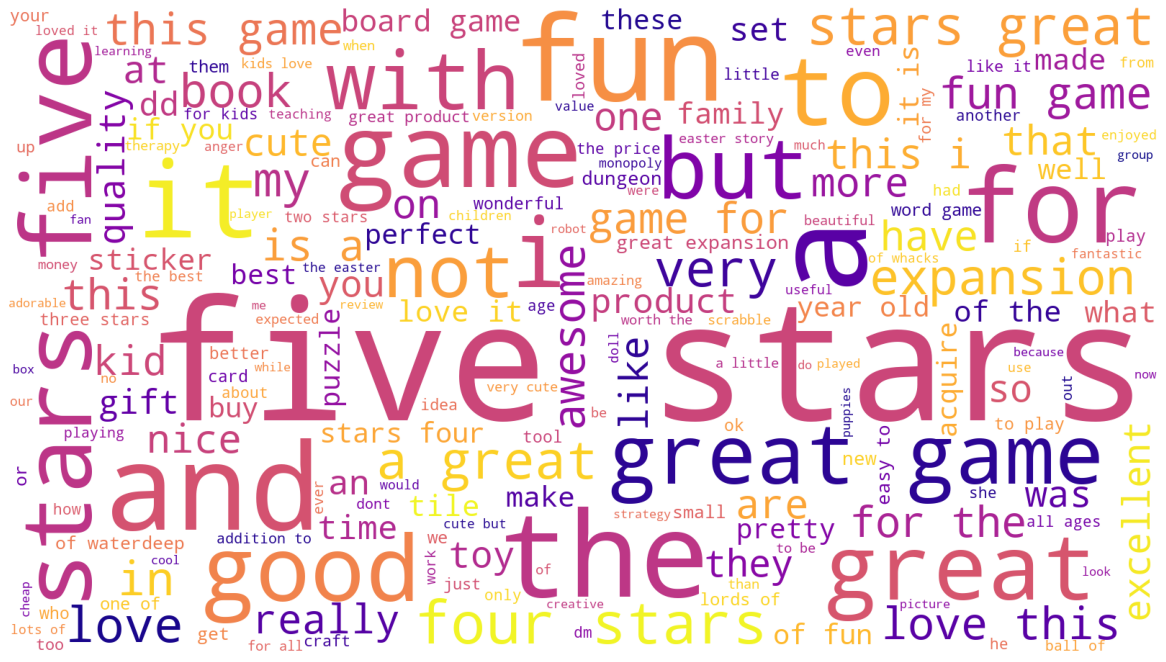

In [57]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [58]:
# Create a list of the review and summary tokens.
all_tokens = all_tokens1 + all_tokens2
all_tokens

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [59]:
# Determine the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5712, 'and': 3401, 'a': 3400, 'to': 3354, 'of': 2627, 'it': 2233, 'i': 2176, 'game': 1990, 'this': 1911, 'is': 1885, ...})

### 4b) Remove alphanumeric characters and stopwords

In [60]:
# Delete all the alpanum.
tokens = [word for word in all_tokens if word.isalnum()]

In [61]:
# Preview the tokens.
tokens

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [62]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))

tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens3_string = ''

# Add each filtered token word to the string.
for value in tokens2:
    tokens3_string = tokens3_string + value + ' '

### 4c) Create wordcloud without stopwords

In [63]:
# Create a wordcloud without stop words.
wordcloud3 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens3_string) 

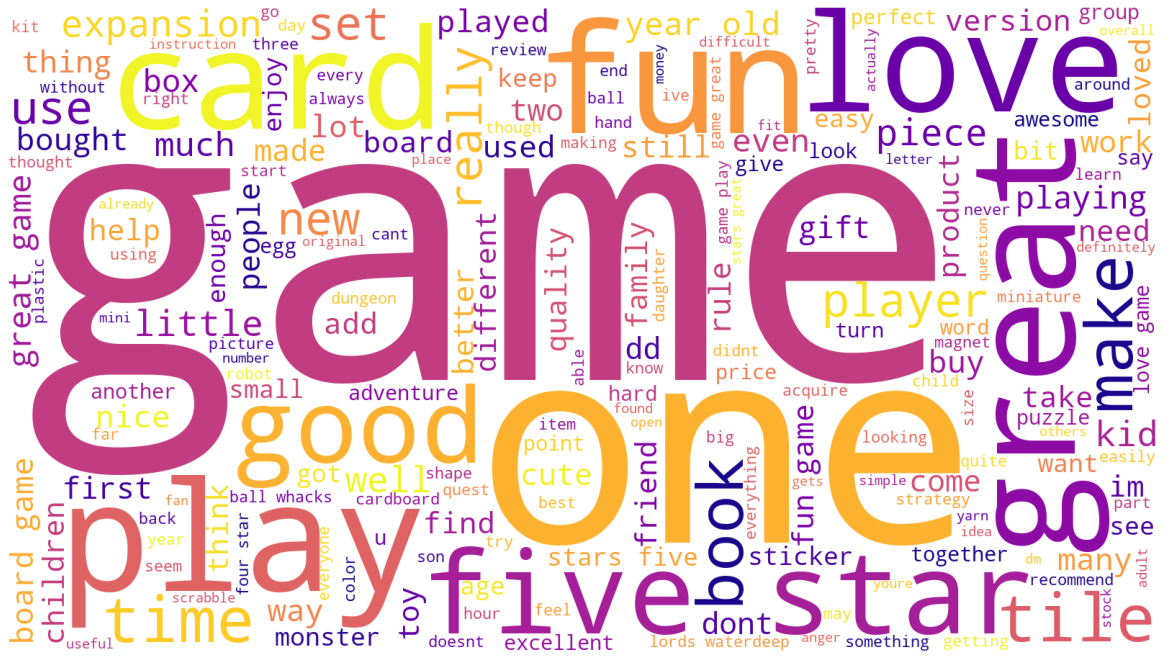

In [64]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud3) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [65]:
# Determine the 15 most common words.
fdist1 = FreqDist(tokens2)

counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency'])

counts

,Word,Frequency
0,game,1990
1,great,875
2,fun,770
3,one,568
4,play,528
5,like,468
6,stars,464
7,love,416
8,good,381
9,five,362


In [66]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Determine the polarity score of the 15 most common words.
counts['polarity'] = counts['Word'].apply(generate_polarity)

counts

,Word,Frequency,polarity
0,game,1990,-0.4
1,great,875,0.8
2,fun,770,0.3
3,one,568,0.0
4,play,528,0.0
5,like,468,0.0
6,stars,464,0.0
7,love,416,0.5
8,good,381,0.7
9,five,362,0.0


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [67]:
# Determine polarity of both columns. 
df4['review_polarity'] = df4['review'].apply(generate_polarity)
df4['summary_polarity'] = df4['summary'].apply(generate_polarity)

# View output.
df4

,index,review,summary,tokens1,tokens2,review_polarity,summary_polarity
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.150000
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.800000
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.000000
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.000000
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.000000
...,...,...,...,...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w...",0.168750,0.200000
1957,1996,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]",0.158333,0.316667
1958,1997,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]",0.200000,0.200000
1959,1998,fun game,four stars,"[fun, game]","[four, stars]",-0.050000,0.000000


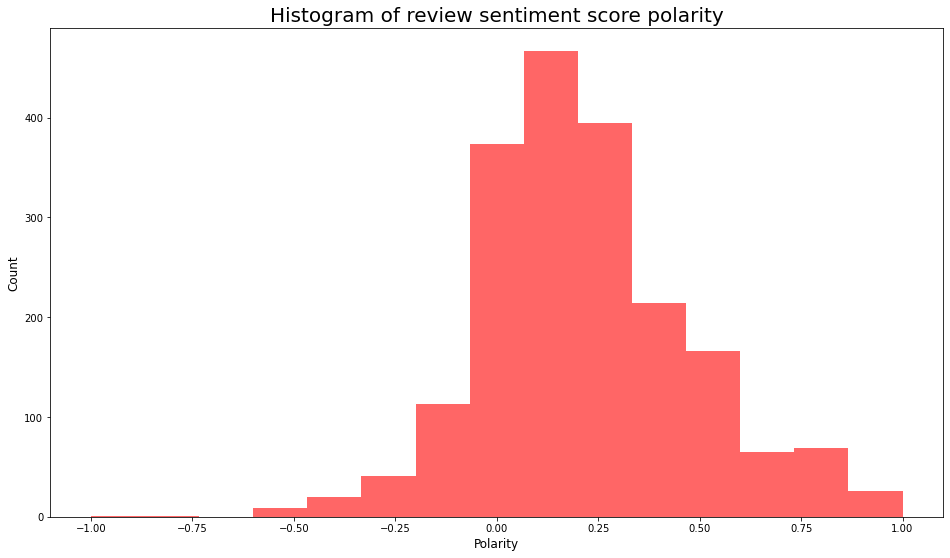

In [68]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

plt.figure(figsize=(16,9))

n, bins, patches = plt.hist(df4['review_polarity'], num_bins, 
                            facecolor='red', alpha=0.6)

plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of review sentiment score polarity', fontsize=20)

plt.show()

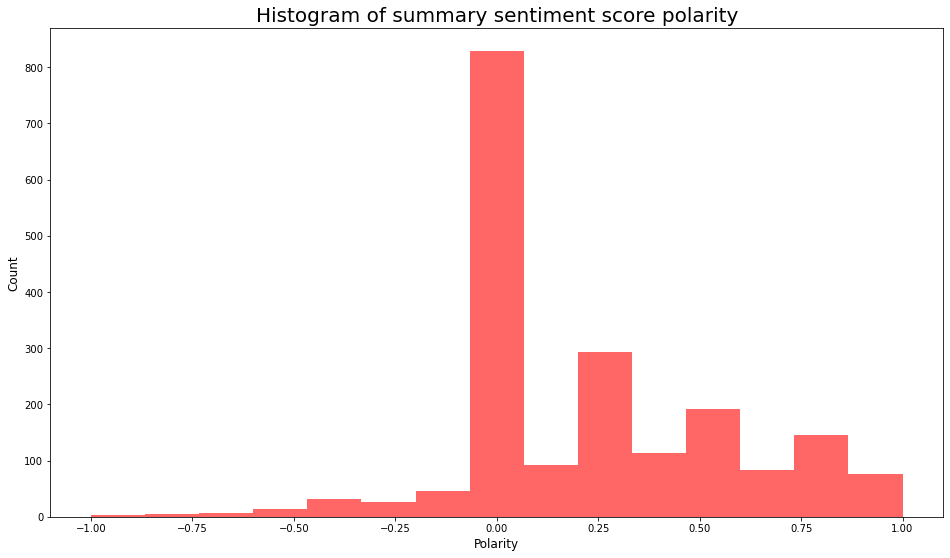

In [69]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

plt.figure(figsize=(16,9))

n, bins, patches = plt.hist(df4['summary_polarity'], num_bins, 
                            facecolor='red', alpha=0.6)

plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of summary sentiment score polarity', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [70]:
# Top 20 negative reviews.
negative_sentiment_review = df4.nsmallest(20, 'review_polarity')

negative_sentiment_review = negative_sentiment_review[['review', 
                                                      'review_polarity']]

# View output.
negative_sentiment_review.style.set_properties(subset=['review'], 
                                               **{'width': '1200px'})

,review,review_polarity
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring and to be frank juvenile,-0.583333
362,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
116,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
226,this was a gift for my daughter i found it difficult to use,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
1501,expensive for what you get,-0.500000


In [71]:
# Top 20 negative summaries.
negative_sentiment_summary = df4.nsmallest(20, 'summary_polarity')

negative_sentiment_summary = negative_sentiment_summary[['summary', 
                                                         'summary_polarity']]

# View output.
negative_sentiment_summary.style.set_properties(subset=['summary'], 
                                                **{'width': '1200px'})

,summary,summary_polarity
21,the worst value ive ever seen,-1.000000
207,boring unless you are a craft person which i am,-1.000000
819,boring,-1.000000
1148,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
143,disappointed,-0.750000
623,disappointed,-0.750000
785,disappointed,-0.750000
1591,disappointed,-0.750000
361,promotes anger instead of teaching calming methods,-0.700000


In [72]:
# Top 20 positive reviews.
positive_sentiment_review = df4.nlargest(20, 'review_polarity')

positive_sentiment_review = positive_sentiment_review[['review', 
                                                      'review_polarity']]

# View output.
positive_sentiment_review.style.set_properties(subset=['review'], 
                                               **{'width': '1200px'})

,review,review_polarity
7,came in perfect condition,1.000000
164,awesome book,1.000000
193,awesome gift,1.000000
489,excellent activity for teaching selfmanagement skills,1.000000
517,perfect just what i ordered,1.000000
583,wonderful product,1.000000
601,delightful product,1.000000
613,wonderful for my grandson to learn the resurrection story,1.000000
782,perfect,1.000000
923,awesome,1.000000


In [73]:
# Top 20 positive summaries.
positive_sentiment_summary = df4.nlargest(20, 'summary_polarity')

positive_sentiment_summary = positive_sentiment_summary[['summary', 
                                                         'summary_polarity']]

# View output.
positive_sentiment_summary.style.set_properties(subset=['summary'], 
                                                **{'width': '1200px'})

,summary,summary_polarity
6,best gm screen ever,1.000000
28,wonderful designs,1.000000
32,perfect,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000
133,perfect for preschooler,1.000000
139,awesome sticker activity for the price,1.000000
160,awesome book,1.000000
162,he was very happy with his gift,1.000000
186,awesome,1.000000
209,awesome and welldesigned for 9 year olds,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

The wordcloud of tokens from both the review and summary columns as well as the list of 15 most common words used across both columns features several word with positive polarity scores: 'great', 'fun', 'love' and 'good'. These words should be utilised in marketing campaigns to provide evidence to prospective customers that existing customers have had amazing experiences with Turtle Games' products.

The histograms of review sentiment score polarity and summary sentiment score polarity indicate that the majority of reviews and summaries of Turtle Games' products are positive, which is a healthy indicator that Turtle Games is performing well, and should be able to improve their sales by demonstrating these positive experiences to potential customers.

Several of the top 20 positive reviews and summaries should be used as pull-quotes in marketing campaigns to again evidence that Turtle Games' products are high-quality to potential new customers. Common themes in the top 20 negative reviews and summaries included difficult instructions to follow, as well as boring products. Turtle Games' product development teams should incorporate this constructive feedback to improve their products, which should in turn attract more consumers and improve sales.

# 